In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import yfinance as yf


In [63]:
ticker = "AAPL"
data = yf.download(ticker, start="2012-01-01", end="2021-07-25")
ticker = "MSFT"
data1 = yf.download(ticker, start="2012-01-01", end="2021-07-25")
ticker = "GANESHHOUC.NS"
data2 = yf.download(ticker, start="2012-01-01", end="2021-07-25")
data = data.reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2405 non-null   datetime64[ns]
 1   (Close, AAPL)   2405 non-null   float64       
 2   (High, AAPL)    2405 non-null   float64       
 3   (Low, AAPL)     2405 non-null   float64       
 4   (Open, AAPL)    2405 non-null   float64       
 5   (Volume, AAPL)  2405 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 112.9 KB


Text(0, 0.5, 'Closing Price')

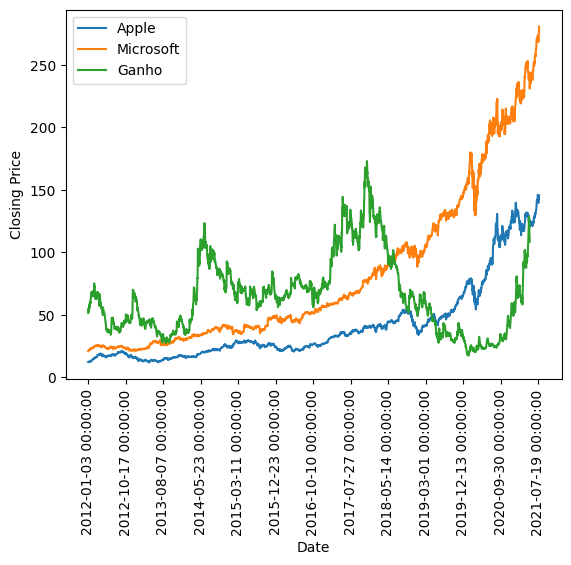

In [68]:
plt.plot(range(data.shape[0]), data['Close'],label = "Apple")
plt.plot(range(data1.shape[0]), data1['Close'],label = "Microsoft")
plt.plot(range(data2.shape[0]), data2['Close'],label = "Ganho")
plt.xticks(range(0, data.shape[0], 200), data['Date'].loc[::200], rotation=90)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')


In [35]:
data['Lag1'] = data['Close'].shift(1)
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA21'] = data['Close'].rolling(window=21).mean()
data['Return'] = data['Close'].pct_change()


In [36]:
data.head(10)

Price,Date,Close,High,Low,Open,Volume,Lag1,MA7,MA21,Return
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
0,2012-01-03,12.375389,12.413608,12.308281,12.320319,302220800,NaN,NaN,NaN,NaN
1,2012-01-04,12.441897,12.479214,12.316708,12.338375,260022000,12.375389,NaN,NaN,0.005374
2,2012-01-05,12.580023,12.595671,12.418721,12.487335,271269600,12.441897,NaN,NaN,0.011102
3,2012-01-06,12.711537,12.722070,12.615840,12.632391,318292800,12.580023,NaN,NaN,0.010454
4,2012-01-09,12.691373,12.872536,12.679937,12.804826,394024400,12.711537,NaN,NaN,-0.001586
5,2012-01-10,12.736814,12.819873,12.684451,12.817164,258196400,12.691373,NaN,NaN,0.003581
6,2012-01-11,12.716049,12.725077,12.618546,12.719961,215084800,12.736814,12.607583,NaN,-0.001630
7,2012-01-12,12.681145,12.726586,12.601697,12.707928,212587200,12.716049,12.651263,NaN,-0.002745
8,2012-01-13,12.633594,12.652854,12.598986,12.630284,226021600,12.681145,12.678648,NaN,-0.003750


In [46]:
data = data.dropna()

In [47]:
# print(X.isnull().sum())  # should all be 0
# print(y.isnull().sum())  # should be 0


In [48]:
X = data[['Lag1', 'MA7', 'MA21', 'Return', 'Volume']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', max_iter=500)
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)

In [51]:
y_pred = model.predict(X_test_scaled)


In [54]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 1.8905891980003342
R2 Score: 0.9955124515946978


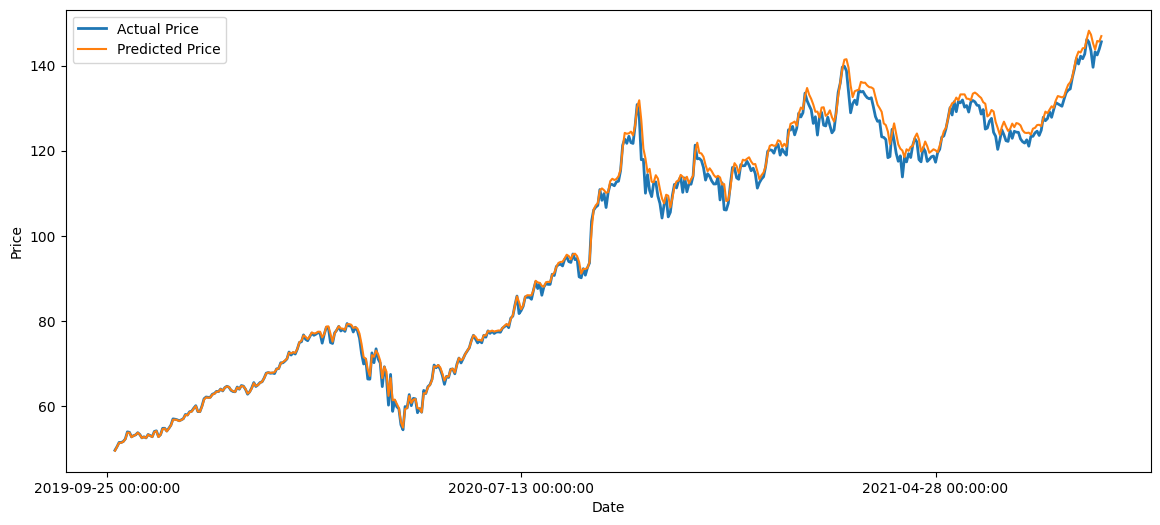

In [62]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual Price', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.xticks(ticks=range(1924, data.shape[0], 200),labels=data['Date'].iloc[range(1924, data.shape[0], 200)])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()